<a href="https://colab.research.google.com/github/Gwan98/Project/blob/main/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PCA

In [ ]:
import pandas as pd 
import numpy as np
import seaborn as sns

from sklearn.decomposition import PCA

# 필요한 패키지와 라이브러리를 가져옴
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
%matplotlib inline


# minus font 
mpl.rcParams['axes.unicode_minus'] = False

# customize matplitlib
plt.rcParams["figure.figsize"] = (20,15)
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.labelsize'] = 15
plt.rcParams['font.size'] = 15

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/method1_cut.csv")
data

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-2.424826,3.170580,-1.923592,0.786328,-1.236363,-1.139193,-0.881473,2.010733,-1.009046,0.466378,...,0.085488,0.290078,0.657969,0.308534,0.350326,-0.383362,-0.405547,0.234800,0.152174,0.890000
1,-7.434403,4.000947,-2.507947,3.537507,-4.823710,0.114263,-4.001537,4.723716,-1.616978,-0.412657,...,-1.607425,0.452607,-0.099938,-0.143582,0.472994,0.044446,0.041564,-3.180129,-1.489497,61.840000
2,-11.059166,-6.248048,-2.228612,-0.859962,-0.323507,0.049241,2.317499,-1.325281,2.664009,4.609459,...,-4.308061,-2.898303,-0.496889,0.419184,0.444313,1.569429,-0.542982,-0.140952,0.983700,283.320000
3,-1.681994,0.928076,2.186931,-0.396015,-0.522530,-0.737281,0.631991,-0.575582,1.486306,0.856746,...,-0.016189,0.080254,0.675759,-0.094717,0.948276,-0.188617,0.282785,-0.849293,-0.117922,4.950000
4,0.965570,-0.158240,0.231163,1.299259,-0.373301,-0.394270,0.120042,-0.017817,0.163276,0.005166,...,-0.018949,0.153491,0.200973,-0.166351,0.061378,0.514986,-0.259438,0.004382,0.036175,120.400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426463,-7.448033,-4.050255,-3.171826,4.553805,1.516735,-3.130865,-5.463226,0.462075,-0.000589,-1.480955,...,-1.823952,-0.447734,-0.420333,-4.346202,0.363006,-1.020204,0.507709,1.783623,-1.309939,11.394278
426464,-0.377964,0.553969,1.383718,2.127599,0.215711,1.249418,-0.928752,-1.625665,-0.245156,0.328761,...,0.138265,-0.365643,0.513727,-0.153797,-0.569395,-0.039091,0.081306,0.087574,-0.013130,20.207052
426465,-26.457745,16.497472,-30.177317,8.904157,-17.892600,-1.227904,-31.197329,-11.438920,-9.462573,-22.187089,...,2.812241,-8.755698,3.460893,0.896538,0.254836,-0.738097,-0.966564,-7.263482,-1.324884,1.000000
426466,-0.274707,4.146707,-6.048966,6.671597,0.978084,-1.693971,-1.849176,0.814960,-4.405062,-4.654015,...,0.706088,0.428955,-0.400705,-0.203764,-0.984154,-0.079998,0.427339,0.638645,0.328034,1.146571


In [ ]:
print(data.columns, len(data.columns))

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object') 29


In [ ]:
# 열별로 scaling 

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

data_scale = pd.DataFrame(scaler.fit_transform(data), columns=data.columns, index = data.index)
data_scale

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.917099,0.800713,0.804081,0.288834,0.757393,0.251566,0.259985,0.746352,0.428020,0.518371,...,0.581176,0.462735,0.600727,0.670016,0.429440,0.556387,0.351767,0.420845,0.316212,0.000035
1,0.831992,0.809474,0.793954,0.411661,0.733243,0.264169,0.240978,0.784590,0.407078,0.500184,...,0.563150,0.465980,0.561448,0.663301,0.445970,0.580401,0.425650,0.357813,0.282897,0.002407
2,0.770412,0.701332,0.798795,0.215334,0.763538,0.263515,0.279474,0.699333,0.554550,0.604090,...,0.534395,0.399085,0.540875,0.671659,0.442105,0.666003,0.329057,0.413909,0.333086,0.011028
3,0.929719,0.777051,0.875310,0.236047,0.762199,0.255607,0.269206,0.709900,0.513981,0.526448,...,0.580093,0.458547,0.601649,0.664027,0.510014,0.567319,0.465510,0.400835,0.310731,0.000193
4,0.974698,0.765589,0.841419,0.311734,0.763203,0.259056,0.266087,0.717761,0.468404,0.508829,...,0.580064,0.460009,0.577043,0.662963,0.390505,0.606814,0.375911,0.416592,0.313858,0.004686
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426463,0.831761,0.724522,0.782450,0.457034,0.775927,0.231542,0.232073,0.724525,0.462760,0.478082,...,0.560845,0.448006,0.544843,0.600889,0.431149,0.520640,0.502677,0.449433,0.286541,0.000444
426464,0.951873,0.773104,0.861391,0.348715,0.767168,0.275582,0.259697,0.695099,0.454335,0.515524,...,0.581737,0.449645,0.593252,0.663150,0.305508,0.575712,0.432217,0.418127,0.312857,0.000787
426465,0.508809,0.941331,0.314484,0.651258,0.645264,0.250674,0.075298,0.556788,0.136811,0.049679,...,0.610209,0.282153,0.745993,0.678748,0.416573,0.536475,0.259063,0.282444,0.286238,0.000039
426466,0.953627,0.811012,0.732594,0.551584,0.772301,0.245988,0.254090,0.729498,0.311033,0.412432,...,0.587783,0.465508,0.545860,0.662408,0.249620,0.573416,0.489396,0.428299,0.319781,0.000045


In [ ]:
# PCA 주성분분석

pca = PCA(random_state = 1107)
X_p = pca.fit_transform(data_scale)

pd.Series(np.cumsum(pca.explained_variance_ratio_))

0     0.690636
1     0.759805
2     0.810518
3     0.841077
4     0.865039
5     0.885290
6     0.903218
7     0.920331
8     0.933857
9     0.946977
10    0.958351
11    0.967417
12    0.975086
13    0.979880
14    0.984045
15    0.987273
16    0.989983
17    0.992246
18    0.994260
19    0.995925
20    0.997065
21    0.997792
22    0.998473
23    0.998942
24    0.999275
25    0.999552
26    0.999810
27    0.999983
28    1.000000
dtype: float64

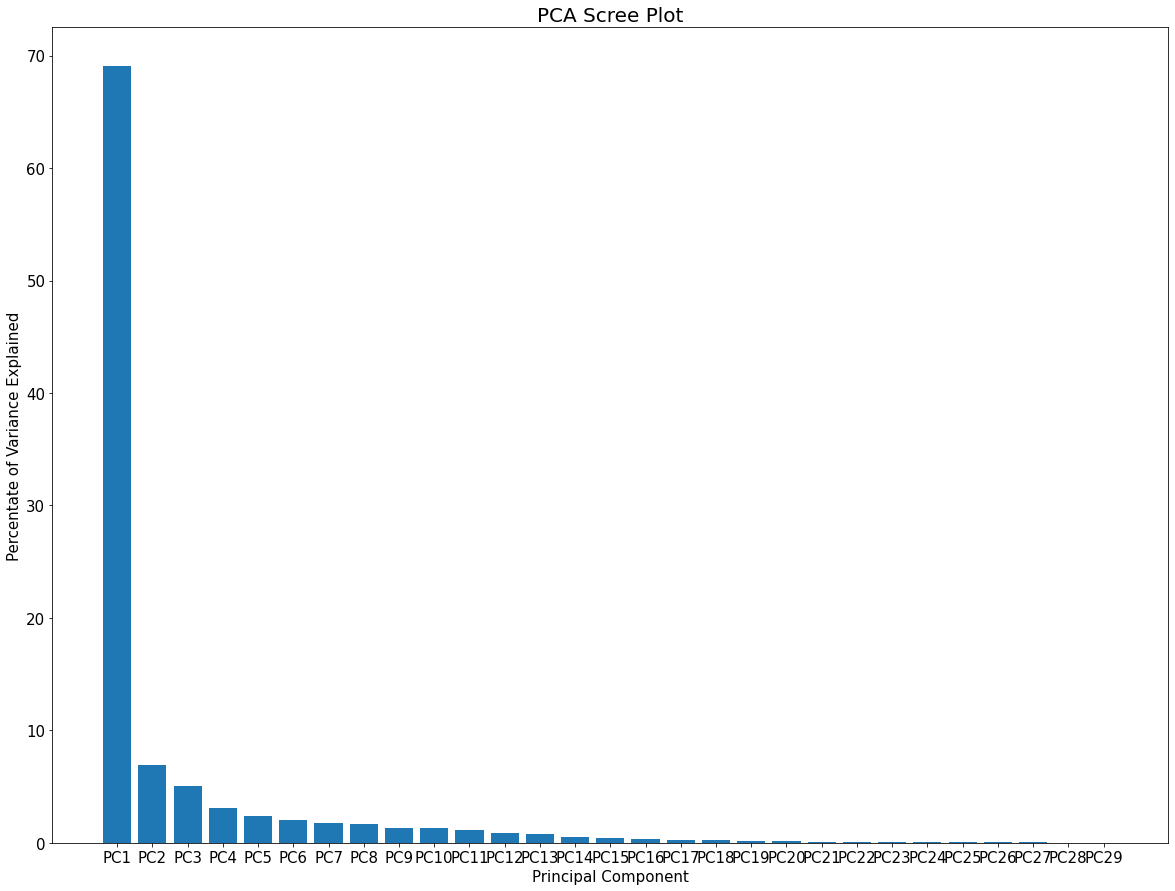

In [ ]:
percent_variance = np.round(pca.explained_variance_ratio_* 100, decimals =2)
columns = []
for i in range(len(percent_variance)):
    columns.append(f'PC{i+1}')
    
ax = plt.bar(x = range(len(percent_variance)), height=percent_variance, tick_label=columns)
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component')
plt.title('PCA Scree Plot')
plt.show()

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 11) # 주성분을 몇개로 할지 결정
printcipalComponents = pca.fit_transform(data_scale)
principalDf = pd.DataFrame(data=printcipalComponents, columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11'])
principalDf

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
0,-0.326134,-0.115467,0.030038,0.119603,0.027040,-0.007519,0.032159,-0.066165,0.040850,-0.031131,0.014750
1,-0.358883,-0.177036,0.088844,0.156988,0.052915,0.141925,0.102273,-0.080946,0.060059,0.083647,-0.082623
2,-0.205764,-0.127789,-0.051141,0.022995,0.115589,-0.045806,0.007122,-0.029849,0.068541,-0.065569,0.021401
3,-0.306309,-0.049977,0.005429,-0.087093,-0.025230,-0.024592,0.111277,0.100189,-0.020248,-0.018854,0.008699
4,-0.303367,-0.035622,0.028237,-0.105682,0.026688,0.011976,0.023704,-0.025295,-0.101048,0.053772,0.011398
...,...,...,...,...,...,...,...,...,...,...,...
426463,0.162959,-0.035766,-0.139886,-0.011462,-0.014489,0.114627,0.061686,-0.055750,0.113001,0.001977,-0.002939
426464,-0.282834,-0.007647,0.029315,-0.116063,-0.042657,0.079725,-0.041760,-0.053798,-0.016650,0.040752,-0.039814
426465,0.822487,-0.316754,0.665351,-0.016064,-0.025977,-0.021512,-0.012071,-0.075064,0.010016,-0.028647,0.083201
426466,0.219771,0.361008,0.003428,0.094968,0.001669,0.089718,-0.007977,-0.087363,0.040631,0.026907,-0.023209


In [ ]:
principalDf.to_csv('test2.csv')